<a href="https://colab.research.google.com/github/Gonaferd/Machine-Learning-comparison/blob/main/solar_power_generation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
plant_1 = pd.read_csv("Plant_1_Generation_Data.csv")
plant_1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
Plant_2 = pd.read_csv("Plant_2_Generation_Data.csv")
Plant_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [4]:
weather_sensor_data_plant_1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
weather_sensor_data_plant_1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [5]:
weather_sensor_data_plant_2 = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")
weather_sensor_data_plant_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [6]:
#Merging of columns and cleaning of data
plant_1.sample(25)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
7551,18-05-2020 17:30,4135001,bvBOhCH3iADSZry,1075.714286,104.557143,4923.000000,6340499.000
51210,09-06-2020 15:45,4135001,adLQvlD726eNBSB,7193.857143,704.457143,7398.857143,6469402.857
35161,01-06-2020 23:15,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,5803.000000,7733624.000
31156,31-05-2020 01:30,4135001,wCURE6d3bPkepu2,0.000000,0.000000,0.000000,6903158.000
38423,03-06-2020 12:30,4135001,bvBOhCH3iADSZry,10598.875000,1035.587500,3485.250000,6448972.250
60296,13-06-2020 23:00,4135001,adLQvlD726eNBSB,0.000000,0.000000,8774.000000,6497496.000
31612,31-05-2020 06:45,4135001,iCRJl6heRkivqQ3,1050.125000,102.050000,46.125000,7298644.125
57671,12-06-2020 17:15,4135001,7JYdWkrLSPkdwr4,1786.285714,175.085714,5608.000000,7812272.000
14261,22-05-2020 12:30,4135001,z9Y9gH1T5YWrNuG,8366.285714,818.214286,3766.571429,7060913.571
5604,17-05-2020 19:30,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,7045.000000,6278650.000


In [7]:
weather_sensor_data_plant_1.sample(25)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2176,2020-06-07 12:30:00,4135001,HmiyD2TTLFNqkNe,28.884908,59.149143,1.006504
51,2020-05-15 12:45:00,4135001,HmiyD2TTLFNqkNe,32.391420,50.631240,0.761243
2776,2020-06-13 18:30:00,4135001,HmiyD2TTLFNqkNe,24.812040,23.990757,0.007280
1530,2020-05-31 18:45:00,4135001,HmiyD2TTLFNqkNe,26.508441,25.073781,0.000000
802,2020-05-24 00:30:00,4135001,HmiyD2TTLFNqkNe,24.327403,21.633982,0.000000
1535,2020-05-31 20:00:00,4135001,HmiyD2TTLFNqkNe,25.099225,22.618831,0.000000
1431,2020-05-30 18:00:00,4135001,HmiyD2TTLFNqkNe,28.943673,28.704978,0.047860
2942,2020-06-15 12:00:00,4135001,HmiyD2TTLFNqkNe,28.601292,44.703941,0.744482
188,2020-05-17 01:45:00,4135001,HmiyD2TTLFNqkNe,23.726536,21.646289,0.000000
3080,2020-06-16 22:30:00,4135001,HmiyD2TTLFNqkNe,22.863535,20.536963,0.000000


In [8]:
Plant_2.sample(25)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
26963,2020-05-29 16:30:00,4136001,PeE6FRyGXUgsRhN,568.433333,557.080000,6162.466667,1.348447e+09
52307,2020-06-10 17:00:00,4136001,PeE6FRyGXUgsRhN,92.028571,89.371429,3980.142857,1.348514e+09
13909,2020-05-22 03:00:00,4136001,Quc1TzYxW2pYoWX,0.000000,0.000000,4896.000000,3.295356e+08
47486,2020-06-08 10:15:00,4136001,LlT2YUhhzqhg5Sw,0.000000,0.000000,1427.000000,2.827442e+08
38377,2020-06-04 02:45:00,4136001,LYwnQax7tkwH5Cb,0.000000,0.000000,0.000000,1.795060e+09
60366,2020-06-14 12:30:00,4136001,oZZkBaNadn6DNKz,0.000000,0.000000,1781.000000,1.708273e+09
1393,2020-05-15 15:45:00,4136001,Mx2yZCDsyf6DPfv,767.928571,751.785714,7019.785714,2.460666e+06
30904,2020-05-31 13:15:00,4136001,V94E5Ben1TlhnDV,1255.173333,1223.966667,4438.266667,1.412210e+09
27656,2020-05-30 00:15:00,4136001,xMbIugepa2P7lBB,0.000000,0.000000,8095.000000,1.067764e+08
44801,2020-06-07 03:45:00,4136001,LYwnQax7tkwH5Cb,0.000000,0.000000,3489.000000,1.795069e+09


In [9]:
weather_sensor_data_plant_2.sample(25)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1448,2020-05-30 02:45:00,4136001,iq8k7ZNt4Mwm3w0,23.590169,23.091042,0.000000
599,2020-05-21 06:15:00,4136001,iq8k7ZNt4Mwm3w0,23.748149,22.193406,0.031929
2651,2020-06-11 16:00:00,4136001,iq8k7ZNt4Mwm3w0,26.016096,29.613267,0.184700
286,2020-05-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.429923,23.824872,0.000000
765,2020-05-22 23:45:00,4136001,iq8k7ZNt4Mwm3w0,27.014191,25.308401,0.000000
2751,2020-06-12 17:00:00,4136001,iq8k7ZNt4Mwm3w0,27.714652,31.382141,0.165161
1157,2020-05-27 01:45:00,4136001,iq8k7ZNt4Mwm3w0,26.302458,25.441988,0.000000
2517,2020-06-10 06:30:00,4136001,iq8k7ZNt4Mwm3w0,24.654891,24.195461,0.028260
2247,2020-06-07 11:00:00,4136001,iq8k7ZNt4Mwm3w0,30.802705,48.107687,0.660778
52,2020-05-15 13:00:00,4136001,iq8k7ZNt4Mwm3w0,36.458581,60.389377,0.926438


In [10]:
#Merging of some columns 
sensor_data_plant_1_df = weather_sensor_data_plant_1[['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] 
sensor_data_plant_1_df

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0
...,...,...,...,...
3177,2020-06-17 22:45:00,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0


In [11]:
Plant_1_with_sensor_data_1 = plant_1.merge(sensor_data_plant_1_df, on="DATE_TIME")
Plant_1_with_sensor_data_1 


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION


In [12]:
sensor_data_plant_1_df2 = weather_sensor_data_plant_1[['PLANT_ID', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] 
sensor_data_plant_1_df2

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,4135001,25.184316,22.857507,0.0
1,4135001,25.084589,22.761668,0.0
2,4135001,24.935753,22.592306,0.0
3,4135001,24.846130,22.360852,0.0
4,4135001,24.621525,22.165423,0.0
...,...,...,...,...
3177,4135001,22.150570,21.480377,0.0
3178,4135001,22.129816,21.389024,0.0
3179,4135001,22.008275,20.709211,0.0
3180,4135001,21.969495,20.734963,0.0


Exploratory Analysis and Visualization

In [13]:
#compute mean sum of daily yield and total yield
Plant_1_daily_yield_mean = plant_1['DAILY_YIELD'].mean()
Plant_1_daily_yield_mean

3295.968737182587

In [14]:
print('The average daily yield of plant 1 at this Indian solar power energy generation is: {:.3f} kWh'.format(round(Plant_1_daily_yield_mean, 3)))

The average daily yield of plant 1 at this Indian solar power energy generation is: 3295.969 kWh


In [15]:
Plant_1_Total_daily_yield = plant_1['DAILY_YIELD'].sum()
Plant_1_Total_daily_yield
print('The total daily yield of plant 1 at this Indian solar power energy generation is: {:.3f} kWh'.format(round(Plant_1_Total_daily_yield, 3)))

The total daily yield of plant 1 at this Indian solar power energy generation is: 226690137.806 kWh


In [16]:
Plant_2_daily_yield_mean = Plant_2['DAILY_YIELD'].mean()
print('The average daily yield of plant 2 at this Indian solar power energy generation is: {:.3f} kWh'.format(Plant_2_daily_yield_mean))

The average daily yield of plant 2 at this Indian solar power energy generation is: 3294.890 kWh


In [17]:
Plant_2_Total_daily_yield = Plant_2['DAILY_YIELD'].sum()
print('The total daily yield of plant 2 at this Indian solar power energy generation is: {:.3f} kWh'.format(Plant_2_Total_daily_yield))

The total daily yield of plant 2 at this Indian solar power energy generation is: 223057483.203 kWh


In [18]:
Mean_ambient_temperature_sensor_1 = weather_sensor_data_plant_1['AMBIENT_TEMPERATURE'].mean()
print('The average daily ambient temperature reading at sensor one is: {:.3f} ºC'.format(Mean_ambient_temperature_sensor_1))

The average daily ambient temperature reading at sensor one is: 25.532 ºC


In [19]:
Mean_module_temperature_sensor_1 = weather_sensor_data_plant_1['MODULE_TEMPERATURE'].mean()
print('The average daily module temperature reading at sensor one is: {:.3f} ºC'.format(Mean_module_temperature_sensor_1))

The average daily module temperature reading at sensor one is: 31.091 ºC


In [20]:
Mean_ambient_temperature_sensor_2 = weather_sensor_data_plant_2['AMBIENT_TEMPERATURE'].mean()
print('The average daily ambient temperature reading at sensor 2 "plant_2" is: {:.3f} ºC'.format(Mean_ambient_temperature_sensor_2))

The average daily ambient temperature reading at sensor 2 "plant_2" is: 28.069 ºC


In [21]:
Mean_module_temperature_sensor_2 = weather_sensor_data_plant_2['MODULE_TEMPERATURE'].mean()
print('The average daily module temperature reading at sensor one is: {:.3f} ºC'.format(Mean_module_temperature_sensor_2))

The average daily module temperature reading at sensor one is: 32.772 ºC


In [22]:
#compute the average and total irradiation levels in Watts.
Mean_irradiation_sensor_1 = weather_sensor_data_plant_1['IRRADIATION'].mean()
print('The daily irradiation levels measured at sensor 1 from Plant one is: {:.4f} W/m^2'.format(Mean_irradiation_sensor_1))

The daily irradiation levels measured at sensor 1 from Plant one is: 0.2283 W/m^2


In [23]:
Mean_irradiation_sensor_2 = weather_sensor_data_plant_2['IRRADIATION'].mean()
print('The daily irradiation levels measured at sensor 2 from Plant 2 is: {:.4f} W/m^2'.format(Mean_irradiation_sensor_2))

The daily irradiation levels measured at sensor 2 from Plant 2 is: 0.2327 W/m^2


In [24]:
Total_irradiation_sensor_1 = weather_sensor_data_plant_1['IRRADIATION'].sum()
print('The total irradiation levels measured at sensor 1 from Plant 1 is: {:2f} W/m^2'.format(round(Total_irradiation_sensor_1, 2)))

The total irradiation levels measured at sensor 1 from Plant 1 is: 726.490000 W/m^2


In [25]:
Total_irradiation_sensor_2 = weather_sensor_data_plant_2['IRRADIATION'].sum()
print('The total irradiation levels measured at sensor 2 from Plant 2 is: {:2f} W/m^2'.format(round(Total_irradiation_sensor_2, 2)))

The total irradiation levels measured at sensor 2 from Plant 2 is: 758.490000 W/m^2


In [26]:
# compute the standard deviation of some numeric data
# compute the standard deviation for the AC_Power measurements at both plants, and the standard deviation results for IRRADIATION levels data from the weather_sensor_data measurements from both sensors.
Standard_deviation_AC_Power_plant_1 = plant_1['AC_POWER'].std()
Standard_deviation_AC_Power_plant_1

394.39643869517806

In [27]:
Mean_AC_Power_plant_1 = plant_1['AC_POWER'].mean()
Mean_AC_Power_plant_1


307.8027522655165

In [28]:
Median_AC_Power_plant_1 = plant_1['AC_POWER'].median()
Median_AC_Power_plant_1

41.493750000000006

In [29]:
Total_AC_Power_plant_1 = plant_1['AC_POWER'].sum()
Total_AC_Power_plant_1

21170057.695317723

In [30]:
print('The standard deviation of the AC Power measurements from Plant 1 is: {:.3f} W'.format(Standard_deviation_AC_Power_plant_1))

The standard deviation of the AC Power measurements from Plant 1 is: 394.396 W


In [31]:
Standard_deviation_AC_Power_plant_2 = Plant_2['AC_POWER'].std()
Standard_deviation_AC_Power_plant_2
print('The standard deviation of the AC Power measurements from Plant 2 is: {:.3f} W'.format(Standard_deviation_AC_Power_plant_2))

The standard deviation of the AC Power measurements from Plant 2 is: 362.112 W


In [32]:
Mean_AC_Power_plant_2 = Plant_2['AC_POWER'].mean()
Mean_AC_Power_plant_2

241.27782520089704

In [33]:
Median_AC_Power_plant_2 = Plant_2['AC_POWER'].median()
Median_AC_Power_plant_2

0.0

In [34]:
Plant_2_df = Plant_2[Plant_2.AC_POWER == 0]
Plant_2_df

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


Next the standard deviation results for the IRRADIATION measurements at both sensors.

In [35]:
STD_Irradiation_sensor_1 = weather_sensor_data_plant_1['IRRADIATION'].std()
print('The standard deviation reading from irradiation measurements at sensor 1 is: {:.4f} W/m^2'.format(STD_Irradiation_sensor_1))

The standard deviation reading from irradiation measurements at sensor 1 is: 0.3008 W/m^2


In [36]:
STD_Irradiation_sensor_2 = weather_sensor_data_plant_2['IRRADIATION'].std()
print('The standard deviation reading from irradiation measurements at sensor 2 is: {:.4f} W/m^2'.format(STD_Irradiation_sensor_2))

The standard deviation reading from irradiation measurements at sensor 2 is: 0.3127 W/m^2


plotting part of exploratory data analysis. In this part we will explore the various plotting possibilities 

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
# plotting DAILY_YIELD data over the entire time series of dates.
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (16, 8)


<Figure size 1296x720 with 0 Axes>

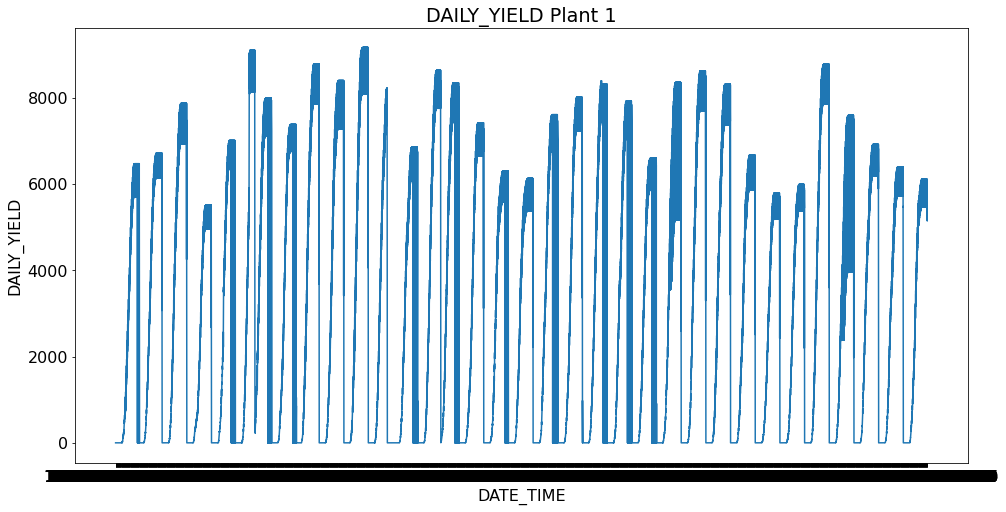

<Figure size 1296x720 with 0 Axes>

In [39]:
plt.plot(plant_1.DATE_TIME, plant_1.DAILY_YIELD)
plt.title('DAILY_YIELD Plant 1');

plt.xlabel('DATE_TIME')
plt.ylabel('DAILY_YIELD')

plt.figure(figsize=(18, 10))

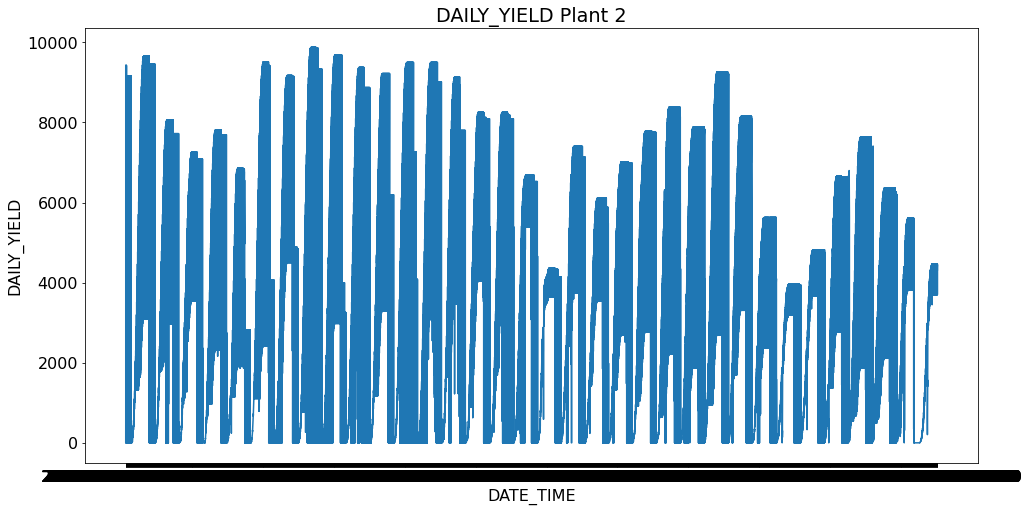

<Figure size 1296x720 with 0 Axes>

In [40]:
plt.plot(Plant_2.DATE_TIME, Plant_2.DAILY_YIELD)
plt.title('DAILY_YIELD Plant 2');

plt.xlabel('DATE_TIME')
plt.ylabel('DAILY_YIELD')

plt.figure(figsize=(18, 10));

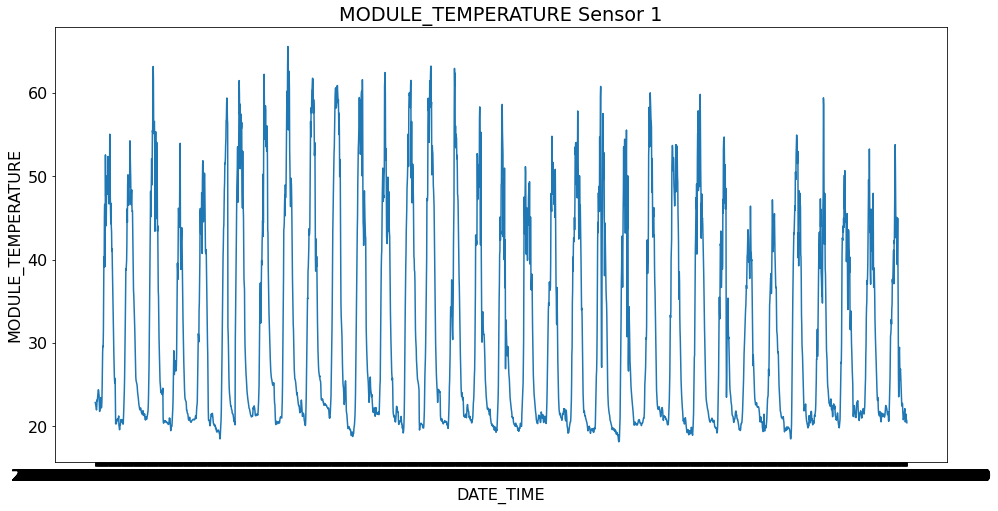

<Figure size 1296x720 with 0 Axes>

In [41]:
plt.plot(weather_sensor_data_plant_1.DATE_TIME, weather_sensor_data_plant_1.MODULE_TEMPERATURE)
plt.title('MODULE_TEMPERATURE Sensor 1');

plt.xlabel('DATE_TIME')
plt.ylabel('MODULE_TEMPERATURE')

plt.figure(figsize=(18, 10));

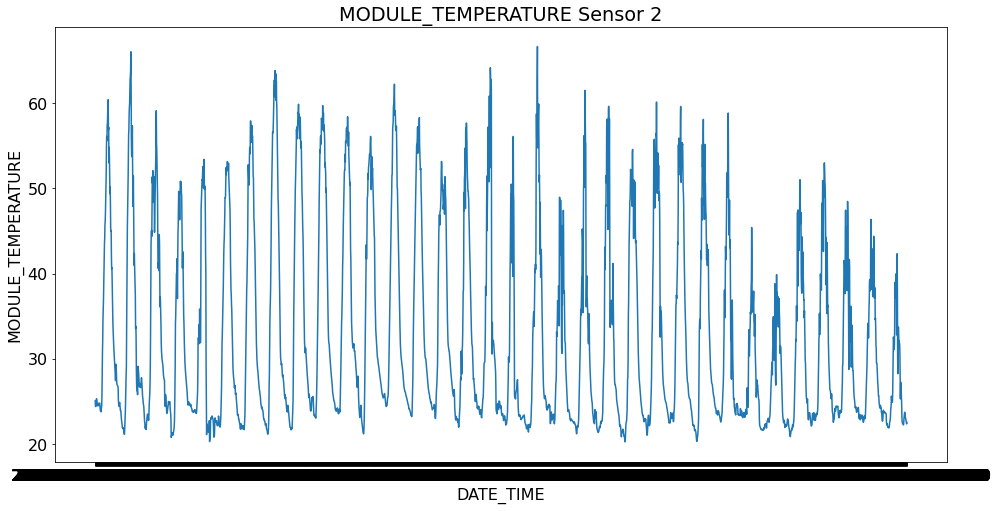

<Figure size 1296x720 with 0 Axes>

In [42]:
plt.plot(weather_sensor_data_plant_2.DATE_TIME, weather_sensor_data_plant_2.MODULE_TEMPERATURE)
plt.title('MODULE_TEMPERATURE Sensor 2');

plt.xlabel('DATE_TIME')
plt.ylabel('MODULE_TEMPERATURE')

plt.figure(figsize=(18, 10));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


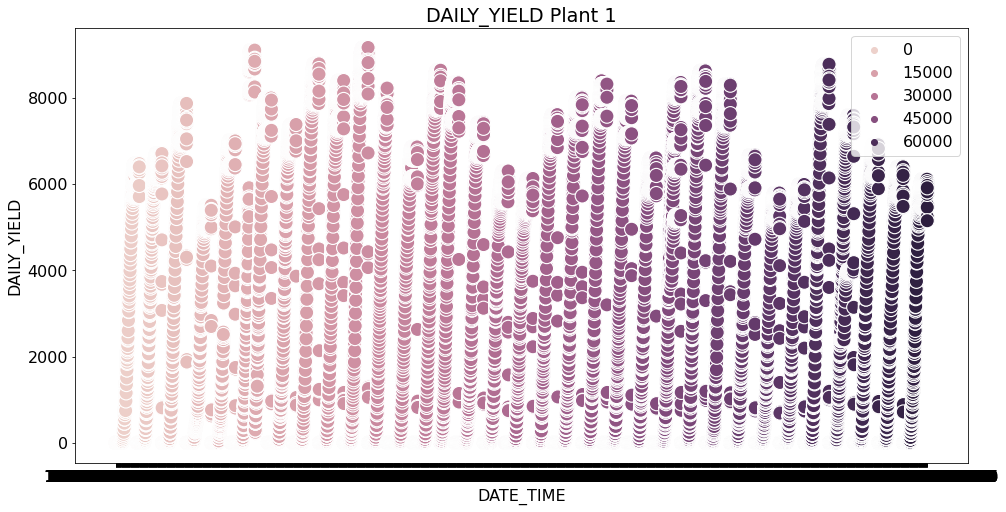

In [43]:
#using seaborn
plt.title('DAILY_YIELD Plant 1');
sns.scatterplot(plant_1.DATE_TIME, plant_1.DAILY_YIELD, hue=plant_1.index, s=200);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


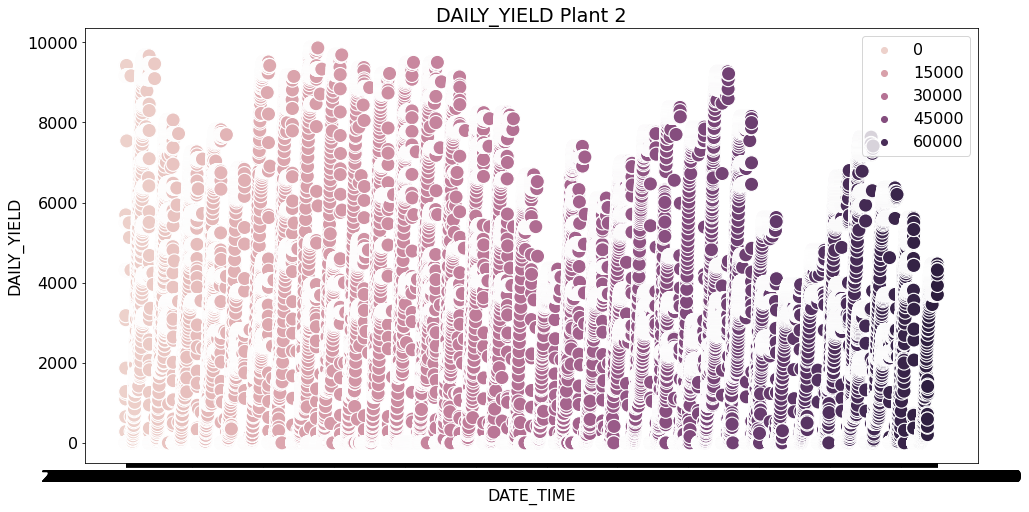

In [44]:
plt.title('DAILY_YIELD Plant 2');
sns.scatterplot(Plant_2.DATE_TIME, Plant_2.DAILY_YIELD, hue=Plant_2.index, s=200);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


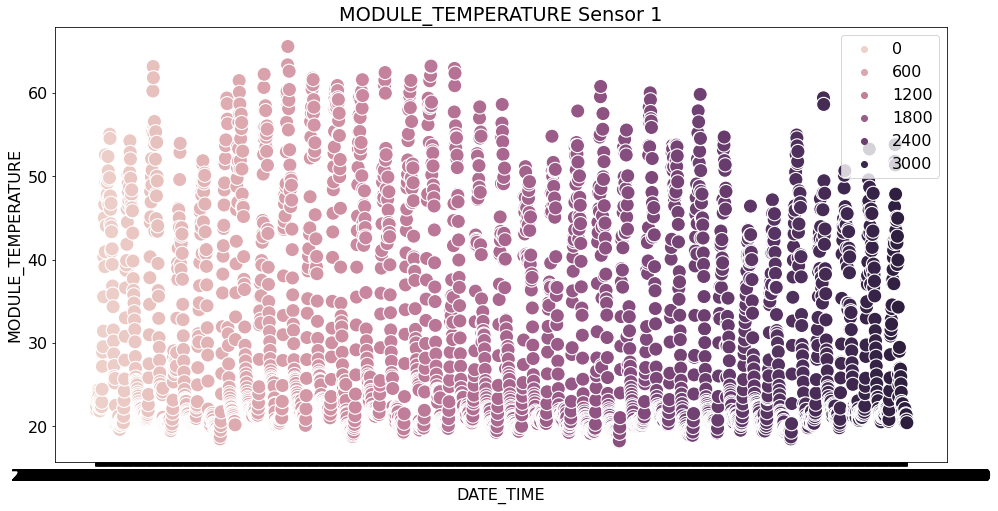

In [45]:
plt.title('MODULE_TEMPERATURE Sensor 1');
sns.scatterplot(weather_sensor_data_plant_1.DATE_TIME, weather_sensor_data_plant_1.MODULE_TEMPERATURE, hue=weather_sensor_data_plant_1.index, s=200);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


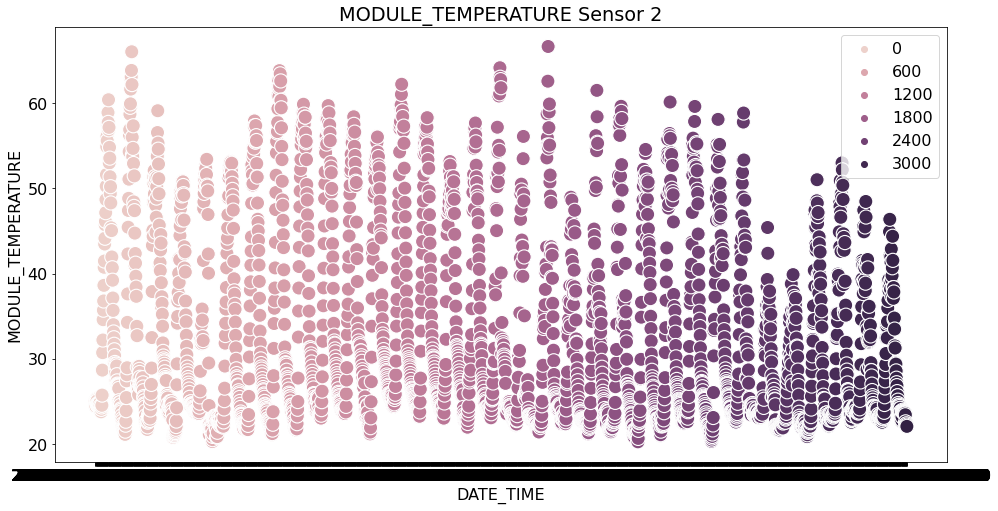

In [46]:
plt.title('MODULE_TEMPERATURE Sensor 2');
sns.scatterplot(weather_sensor_data_plant_1.DATE_TIME, weather_sensor_data_plant_2.MODULE_TEMPERATURE, hue=weather_sensor_data_plant_2.index, s=200);